<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_7_LTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kasus 07. Perusahaan GlobalNet: Meningkatkan Loyalitas Pelanggan dengan Analisis LTV

GlobalNet adalah perusahaan penyedia layanan internet dan telekomunikasi yang menawarkan layanan kepada berbagai segmen pelanggan, termasuk segmen individu dan bisnis. Mereka memiliki berbagai kategori pendapatan pelanggan, mulai dari rendah, menengah, hingga tinggi, serta mengamati frekuensi transaksi pelanggan yang bervariasi. Selain itu, mereka menghitung nilai pelanggan (LTV) dan rata-rata nilai pesanan (AOV).

GlobalNet ingin memahami pola perilaku pelanggan untuk memperbaiki strategi bisnis mereka, khususnya dalam meningkatkan loyalitas dan memaksimalkan lifetime value pelanggan. Untuk mencapai hal ini, tim Data Analyst GlobalNet telah mengumpulkan data terkait durasi berlangganan, nilai LTV, tingkat pendapatan, frekuensi transaksi, dan AOV pelanggan.


## Dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
file_path = "https://docs.google.com/spreadsheets/d/1znCgCHmujwNKQZcVRTrb4aT9Ovahb0kx/export?format=csv"

In [83]:
df = pd.read_csv(file_path)
df.head()

,Pelanggan_ID,Durasi_Berlangganan(Tahun),LTV(Rp),Jenis_Pelanggan,Tingkat_Pendapatan,Frekuensi_Transaksi,Nilai_AOV(Rp)
0,1,0.4,Rp 2.484.410,Bisnis,Tinggi,48,Rp 1.435.711
1,4,0.4,Rp 4.322.466,Bisnis,Tinggi,18,Rp 2.190.283
2,5,0.4,Rp 3.851.317,Individu,Menengah,14,Rp 589.110
3,7,0.4,Rp 3.946.830,Individu,Rendah,13,Rp 764.954
4,16,0.4,Rp 2.626.045,Individu,Menengah,15,Rp 900.435


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pelanggan_ID                1000 non-null   int64  
 1   Durasi_Berlangganan(Tahun)  1000 non-null   float64
 2   LTV(Rp)                     1000 non-null   object 
 3   Jenis_Pelanggan             1000 non-null   object 
 4   Tingkat_Pendapatan          1000 non-null   object 
 5   Frekuensi_Transaksi         1000 non-null   int64  
 6   Nilai_AOV(Rp)               1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [85]:
df.duplicated().sum()

0

In [86]:
df.isnull().sum()

,0
Pelanggan_ID,0
Durasi_Berlangganan(Tahun),0
LTV(Rp),0
Jenis_Pelanggan,0
Tingkat_Pendapatan,0
Frekuensi_Transaksi,0
Nilai_AOV(Rp),0


## Soal 1
Berapa lama durasi berlangganan rata-rata untuk setiap kategori tingkat pendapatan?

Bagaimana durasi berlangganan bervariasi antara pelanggan berpendapatan rendah, menengah, dan tinggi? Insight ini penting untuk memahami apakah pelanggan dengan pendapatan yang lebih tinggi cenderung bertahan lebih lama.



### Jawab :

In [87]:
# Rata-rata Durasi Berlangganan Berdasarkan Tingkat Pendapatan
avg_duration_income = df.groupby("Tingkat_Pendapatan")["Durasi_Berlangganan(Tahun)"].mean()
avg_duration_income

,Durasi_Berlangganan(Tahun)
Tingkat_Pendapatan,
Menengah,1.548072
Rendah,1.558427
Tinggi,1.483444


<ipython-input-88-c29adf4bc4a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_income.index, y=avg_duration_income.values, palette="viridis")


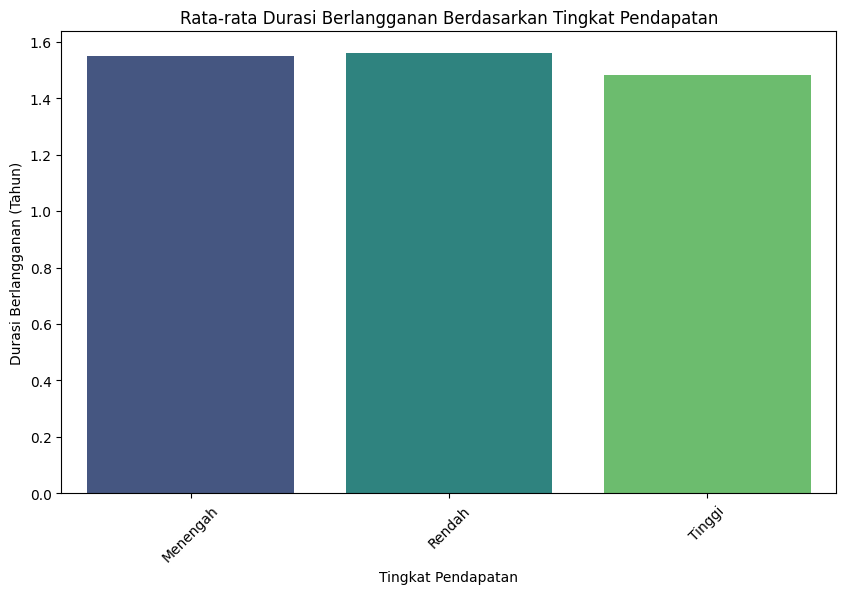

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration_income.index, y=avg_duration_income.values, palette="viridis")
plt.title("Rata-rata Durasi Berlangganan Berdasarkan Tingkat Pendapatan")
plt.xlabel("Tingkat Pendapatan")
plt.ylabel("Durasi Berlangganan (Tahun)")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Pendapatan Rendah: Pelanggan dengan tingkat pendapatan rendah memiliki rata-rata durasi berlangganan terlama, yaitu sekitar 1,56 tahun. Ini menunjukkan bahwa pelanggan dalam kategori ini cenderung lebih bertahan lama dengan layanan yang mereka terima. Hal ini bisa terjadi karena pelanggan berpendapatan rendah cenderung lebih loyal atau mungkin kurang sensitif terhadap perubahan harga atau penawaran alternatif dari pesaing.
2. Pendapatan Menengah: Rata-rata durasi berlangganan untuk pelanggan dengan pendapatan menengah adalah sekitar 1,55 tahun, sedikit lebih rendah dibandingkan dengan kelompok pendapatan rendah. Meski perbedaannya tidak signifikan, kelompok ini juga menunjukkan kecenderungan bertahan yang baik. Pelanggan dengan pendapatan menengah mungkin merasa bahwa layanan yang mereka terima sebanding dengan pengeluaran mereka, sehingga mereka tidak terburu-buru untuk beralih ke layanan lain.
3. Pendapatan Tinggi: Menariknya, pelanggan dengan pendapatan tinggi memiliki rata-rata durasi berlangganan yang paling rendah, yaitu 1,48 tahun. Hal ini bisa menunjukkan bahwa pelanggan dalam kelompok ini lebih cepat beralih ke layanan lain yang mereka anggap menawarkan lebih banyak manfaat atau keunggulan. Pelanggan berpendapatan tinggi cenderung lebih fleksibel dalam hal pengeluaran, sehingga mereka mungkin lebih sering mencari opsi lain yang dapat memberikan pengalaman yang lebih premium atau sesuai dengan preferensi mereka.

**Insight yang Dapat Diambil:**
- Loyalitas Pelanggan Pendapatan Rendah dan Menengah: Pelanggan dengan pendapatan rendah dan menengah menunjukkan tingkat loyalitas yang lebih tinggi dalam hal durasi berlangganan. Hal ini dapat menjadi peluang untuk mempertahankan mereka dengan menawarkan program loyalitas yang sesuai dengan kebutuhan mereka, seperti diskon atau program berlangganan jangka panjang yang lebih ekonomis.
- Pelanggan Pendapatan Tinggi Lebih Rentan Beralih: Pelanggan dengan pendapatan tinggi, meskipun memiliki daya beli yang lebih besar, justru cenderung lebih cepat beralih. Ini mungkin disebabkan oleh harapan yang lebih tinggi terhadap kualitas layanan atau penawaran khusus. Untuk mempertahankan kelompok ini, perusahaan dapat mempertimbangkan untuk menawarkan layanan premium, personalisasi yang lebih baik, atau fasilitas eksklusif yang dapat meningkatkan kepuasan mereka.

Secara keseluruhan, meskipun perbedaannya tidak terlalu besar, terdapat pola yang menunjukkan bahwa pelanggan dengan tingkat pendapatan lebih tinggi mungkin memerlukan pendekatan yang berbeda untuk meningkatkan retensi mereka.



## Soal 2

Bagaimana pola LTV (Lifetime Value) bervariasi berdasarkan tingkat pendapatan dan jenis pelanggan?

Apakah pelanggan dari segmen bisnis memiliki LTV yang lebih tinggi dibandingkan individu? Apakah ada perbedaan yang signifikan dalam LTV antara kategori pendapatan rendah, menengah, dan tinggi?

### Jawab :

In [89]:
# Mengonversi kolom "LTV(Rp)" menjadi numerik sebelum melakukan groupby
df["LTV(Rp)"] = df["LTV(Rp)"].replace("[Rp,.\s]", '', regex=True).astype(float)

# Rata-rata LTV berdasarkan Tingkat Pendapatan dan Jenis Pelanggan
avg_ltv_income = df.groupby(["Tingkat_Pendapatan", "Jenis_Pelanggan"])["LTV(Rp)"].mean().reset_index()
avg_ltv_income

,Tingkat_Pendapatan,Jenis_Pelanggan,LTV(Rp)
0,Menengah,Bisnis,1.035379e+07
1,Menengah,Individu,9.213662e+06
2,Rendah,Individu,9.001946e+06
3,Tinggi,Bisnis,9.188172e+06
4,Tinggi,Individu,9.404331e+06


In [90]:
# Menyiapkan data untuk plotting
categories = avg_ltv_income["Tingkat_Pendapatan"].unique()
jenis_pelanggan = avg_ltv_income["Jenis_Pelanggan"].unique()

In [91]:
# Membuat posisi untuk setiap grup
x = np.arange(len(categories))
width = 0.35

In [92]:
# Memisahkan data berdasarkan jenis pelanggan
ltv_bisnis = avg_ltv_income[avg_ltv_income["Jenis_Pelanggan"] == "Bisnis"]["LTV(Rp)"]
ltv_individu = avg_ltv_income[avg_ltv_income["Jenis_Pelanggan"] == "Individu"]["LTV(Rp)"]

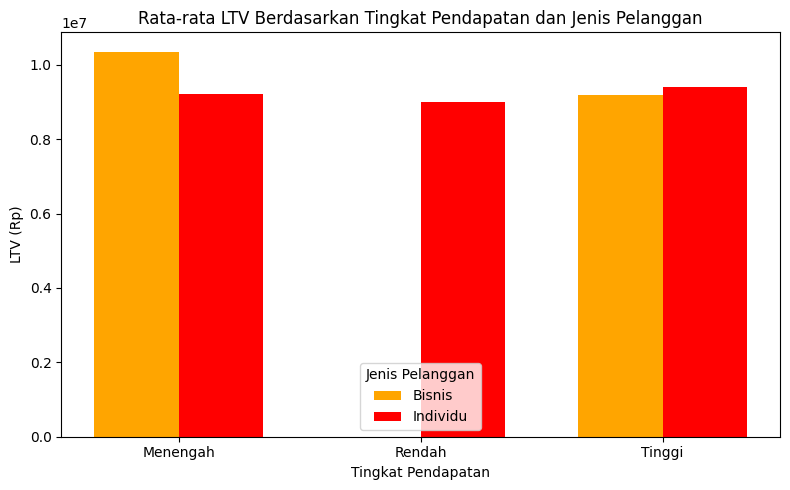

In [93]:
# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
# Ensure ltv_bisnis and ltv_individu have the same length as categories
ltv_bisnis = avg_ltv_income[avg_ltv_income["Jenis_Pelanggan"] == "Bisnis"][
    "LTV(Rp)"
].values  # get values as a numpy array
ltv_individu = avg_ltv_income[avg_ltv_income["Jenis_Pelanggan"] == "Individu"][
    "LTV(Rp)"
].values  # get values as a numpy array

# Check if any category is missing for either group and fill with 0 if necessary
for cat in categories:
    if cat not in avg_ltv_income[
        avg_ltv_income["Jenis_Pelanggan"] == "Bisnis"
    ]["Tingkat_Pendapatan"].values:
        ltv_bisnis = np.insert(ltv_bisnis, np.where(categories == cat)[0][0], 0)
    if cat not in avg_ltv_income[
        avg_ltv_income["Jenis_Pelanggan"] == "Individu"
    ]["Tingkat_Pendapatan"].values:
        ltv_individu = np.insert(
            ltv_individu, np.where(categories == cat)[0][0], 0
        )

ax.bar(x - width / 2, ltv_bisnis, width, label="Bisnis", color="orange")
ax.bar(x + width / 2, ltv_individu, width, label="Individu", color="red")


# Menambahkan label, judul, dan legenda
ax.set_xlabel("Tingkat Pendapatan")
ax.set_ylabel("LTV (Rp)")
ax.set_title("Rata-rata LTV Berdasarkan Tingkat Pendapatan dan Jenis Pelanggan")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(title="Jenis Pelanggan")

# Menampilkan plot
plt.tight_layout()
plt.show()

### Analisis :

1. Pelanggan Bisnis (Menengah): Pelanggan bisnis dengan pendapatan menengah memiliki LTV tertinggi, yaitu sekitar Rp 10.35 juta. Ini menunjukkan bahwa pelanggan bisnis di segmen ini cenderung memberikan kontribusi yang lebih besar terhadap total pendapatan perusahaan dibandingkan dengan segmen lainnya.
2. Pelanggan Individu (Menengah): Pelanggan individu dengan pendapatan menengah memiliki LTV yang lebih rendah, yaitu sekitar Rp 9.21 juta. Meskipun tidak sebanding dengan pelanggan bisnis dalam segmen yang sama, nilai ini masih lebih tinggi dibandingkan dengan beberapa kelompok lainnya.
3. Pelanggan Individu (Rendah): Pelanggan individu dengan pendapatan rendah memiliki LTV sekitar Rp 9.00 juta. Meskipun pendapatan mereka rendah, mereka tetap memberikan kontribusi yang signifikan dalam hal nilai seumur hidup, hampir setara dengan beberapa segmen berpendapatan lebih tinggi.
4. Pelanggan Bisnis (Tinggi): Pelanggan bisnis berpendapatan tinggi memiliki LTV sekitar Rp 9.19 juta. Meskipun mereka berada di segmen pendapatan tertinggi, nilai LTV mereka sedikit lebih rendah dibandingkan dengan pelanggan bisnis berpendapatan menengah.
5. Pelanggan Individu (Tinggi): Pelanggan individu dengan pendapatan tinggi memiliki LTV sekitar Rp 9.40 juta, yang sedikit lebih tinggi dibandingkan dengan pelanggan bisnis dalam segmen yang sama. Ini menunjukkan bahwa ada potensi bagi pelanggan individu berpendapatan tinggi untuk tetap memberikan kontribusi yang signifikan terhadap pendapatan.

**Insight Utama:**
- Pelanggan Bisnis vs Individu: Secara umum, pelanggan bisnis dengan pendapatan menengah memiliki LTV tertinggi, yang menunjukkan bahwa segmen ini lebih menguntungkan bagi perusahaan. Namun, perbedaannya dengan segmen individu tidak terlalu besar, terutama di tingkat pendapatan tinggi.
- LTV Berdasarkan Tingkat Pendapatan: Pelanggan berpendapatan menengah, baik bisnis maupun individu, cenderung memiliki LTV yang lebih tinggi. Pelanggan berpendapatan rendah dan tinggi memiliki nilai LTV yang relatif mirip, dengan variasi kecil di antara segmen-segmen tersebut.

Analisis ini menunjukkan bahwa meskipun pelanggan bisnis di segmen pendapatan menengah memiliki kontribusi LTV tertinggi, pelanggan dari segmen lain juga memberikan kontribusi yang signifikan. Strategi retensi dan pemasaran dapat difokuskan untuk mempertahankan pelanggan bisnis menengah sekaligus meningkatkan layanan bagi pelanggan individu berpendapatan tinggi.


## Soal 3

Apakah terdapat korelasi antara frekuensi transaksi dengan nilai AOV (Average Order Value)?

Apakah pelanggan yang lebih sering bertransaksi cenderung memiliki AOV yang lebih tinggi atau lebih rendah? Bagaimana hal ini berpengaruh terhadap segmen pelanggan bisnis dan individu?




### Jawab :

In [94]:
# Mengonversi kolom "LTV(Rp)" dan "Nilai_AOV(Rp)" menjadi numerik
df["LTV(Rp)"] = df["LTV(Rp)"].replace("[Rp,.\s]", '', regex=True).astype(float)
df["Nilai_AOV(Rp)"] = df['Nilai_AOV(Rp)'].replace('[Rp,.\s]', '', regex=True).astype(float)

In [95]:
# Menghitung korelasi Pearson antara Frekuensi Transaksi dan Nilai AOV
correlation = df["Frekuensi_Transaksi"].corr(df["Nilai_AOV(Rp)"])
print(f"Korelasi antara Frekuensi Transaksi dan Nilai AOV: {correlation:.2f}")

Korelasi antara Frekuensi Transaksi dan Nilai AOV: 0.30


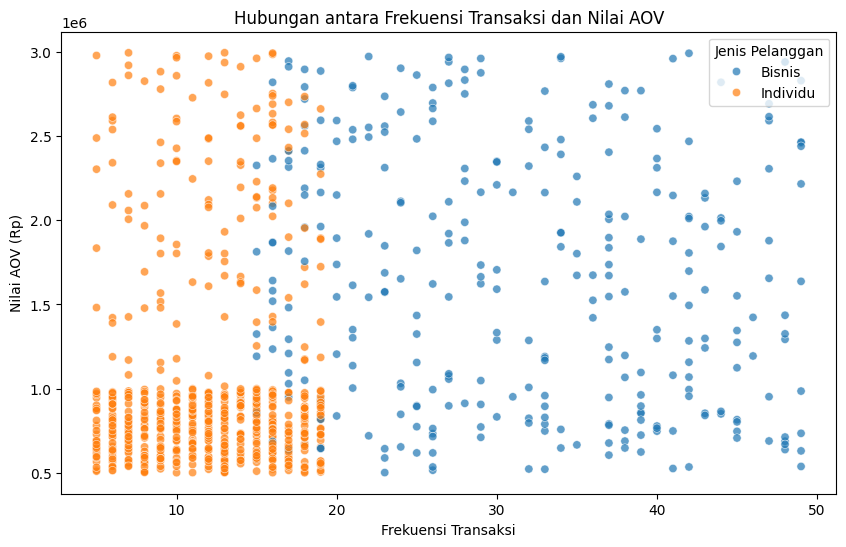

In [96]:
# Membuat scatter plot untuk melihat hubungan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Frekuensi_Transaksi", y="Nilai_AOV(Rp)", hue="Jenis_Pelanggan", alpha=0.7)
plt.title("Hubungan antara Frekuensi Transaksi dan Nilai AOV")
plt.xlabel("Frekuensi Transaksi")
plt.ylabel("Nilai AOV (Rp)")
plt.legend(title="Jenis Pelanggan")
plt.show()

In [97]:
# Membandingkan statistik deskriptif per segmen pelanggan
segmented_stats = df.groupby("Jenis_Pelanggan")[["Frekuensi_Transaksi", "Nilai_AOV(Rp)"]].describe()
print(segmented_stats)

                Frekuensi_Transaksi                                          \
                              count       mean        std   min   25%   50%   
Jenis_Pelanggan                                                               
Bisnis                        316.0  31.357595  10.106197  15.0  23.0  31.5   
Individu                      684.0  12.042398   4.165635   5.0   9.0  12.0   

                            Nilai_AOV(Rp)                               \
                  75%   max         count          mean            std   
Jenis_Pelanggan                                                          
Bisnis           40.0  49.0         316.0  1.642679e+06  750407.299473   
Individu         16.0  19.0         684.0  1.029486e+06  612737.954822   

                                                                        
                      min        25%        50%         75%        max  
Jenis_Pelanggan                                                         
Bisnis        

### Analisis :

1. Korelasi antara Frekuensi Transaksi dan Nilai AOV
  - Nilai korelasi antara frekuensi transaksi dan nilai AOV adalah 0.30, yang menunjukkan korelasi positif lemah hingga sedang. Ini menunjukkan bahwa, meskipun hubungan ini tidak sangat kuat, pelanggan dengan frekuensi transaksi yang lebih tinggi cenderung memiliki nilai AOV yang sedikit lebih tinggi.

2. Perbedaan Segmen Pelanggan (Bisnis vs Individu)
- Pelanggan Bisnis:
  - Rata-rata frekuensi transaksi: 31.36 transaksi (lebih tinggi dibandingkan segmen individu).
  - Rata-rata AOV: Rp 1,642,679 (lebih tinggi dibandingkan segmen individu).
  - Rentang AOV: Rp 500,916 hingga Rp 2,992,285.
  - Pelanggan bisnis lebih sering bertransaksi dan memiliki AOV yang lebih besar, mencerminkan nilai pesanan yang lebih tinggi per transaksi.
- Pelanggan Individu:
  - Rata-rata frekuensi transaksi: 12.04 transaksi.
  - Rata-rata AOV: Rp 1,029,486.
  - Rentang AOV: Rp 500,037 hingga Rp 2,995,457.
  - Meskipun AOV rata-rata lebih rendah dibandingkan pelanggan bisnis, rentang nilai AOV menunjukkan bahwa beberapa pelanggan individu juga dapat mencapai AOV yang sangat tinggi.

3. Dampak pada Strategi Segmentasi

- Pelanggan GlobalNet:
  - Pelanggan perusahaan memiliki nilai AOV dan frekuensi transaksi yang lebih tinggi, yang membuat mereka segmen yang lebih menguntungkan. Untuk menjaga pelanggan bisnis tetap aktif dan meningkatkan durasi langganan, GlobalNet dapat berkonsentrasi pada program loyalitas.
  - Pelanggan individu cenderung memiliki AOV lebih rendah, tetapi jumlahnya lebih banyak. Untuk meningkatkan AOV di segmen ini, GlobalNet dapat membuat rencana upselling atau cross-selling.

- Strategi untuk Menjadi Berbeda:
  - Pelanggan bisnis mungkin menginginkan layanan yang lebih unik, seperti fitur premium, SLA (Service Level Agreement) yang lebih baik, atau diskon volume. Sebaliknya, untuk pelanggan individu, paket yang fleksibel dan promosi khusus dapat meningkatkan loyalitas pelanggan.

- Peningkatan Value Lifetime (LTV):
  - Seperti yang ditunjukkan oleh korelasi positif antara AOV dan frekuensi transaksi, keterlibatan pelanggan yang lebih tinggi dapat secara tidak langsung meningkatkan AOV dan LTV.

**Rekomendasi untuk Program**
1. Loyalitas GlobalNet: Untuk memastikan tingkat frekuensi transaksi tetap tinggi, tawarkan pelanggan bisnis program loyalitas berbasis volume transaksi.
2. Upselling untuk Segmen Individu: Temukan pelanggan individu dengan AOV yang lebih besar dari rata-rata dan berikan mereka paket layanan tambahan untuk meningkatkan LTV mereka.
3. Penargetan Berdasarkan Data: Membuat kampanye pemasaran yang terpersonalisasi dengan menggunakan data segmentasi. Misalnya, fokus pada klien perusahaan dengan memberikan layanan tambahan, seperti bandwidth lebih tinggi atau penawaran eksklusif.
4. Analisis Lebih Lanjut: Untuk mengetahui apa yang memengaruhi perilaku pelanggan secara keseluruhan, pelajari komponen lain seperti tingkat pendapatan dan jangka waktu langganan.




## Soal 4

Bagaimana distribusi LTV di antara segmen pelanggan individu dan bisnis?

GlobalNet tertarik untuk mengetahui apakah segmen bisnis memberikan kontribusi yang lebih signifikan terhadap pendapatan perusahaan dibandingkan dengan segmen individu, berdasarkan distribusi LTV.



### Jawab :

In [98]:
ltv_stats = df.groupby("Jenis_Pelanggan")["LTV(Rp)"].describe()
print(ltv_stats)

                 count          mean           std        min        25%  \
Jenis_Pelanggan                                                            
Bisnis           316.0  9.520151e+06  5.961464e+06  2010699.0  3679370.5   
Individu         684.0  9.175089e+06  5.999510e+06  2019675.0  3595459.0   

                        50%         75%         max  
Jenis_Pelanggan                                      
Bisnis           10752311.0  15149356.0  19819552.0  
Individu          4974257.0  14825459.5  19975392.0  


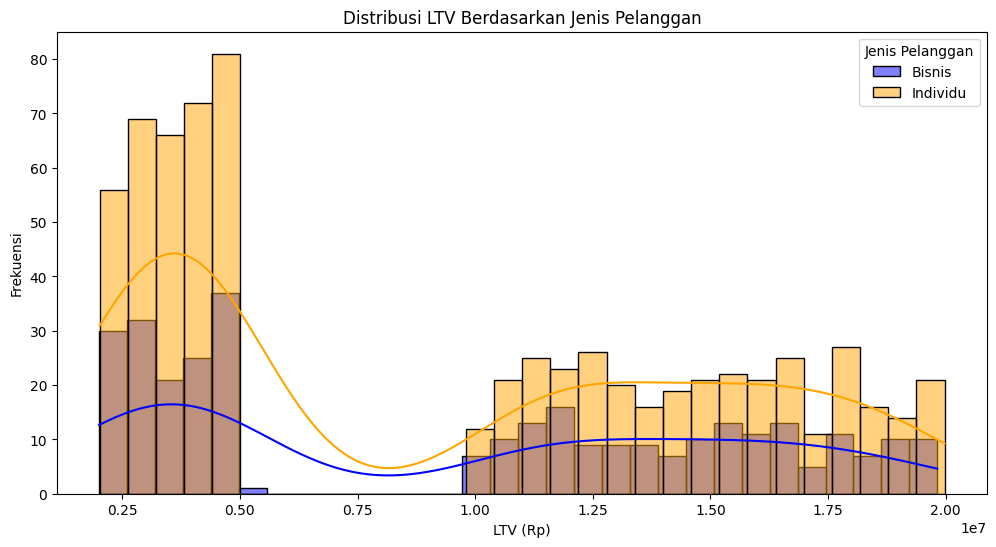

In [99]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df["Jenis_Pelanggan"] == "Bisnis"], x="LTV(Rp)", bins=30, kde=True, color="blue", label="Bisnis")
sns.histplot(data=df[df["Jenis_Pelanggan"] == "Individu"], x="LTV(Rp)", bins=30, kde=True, color="orange", label="Individu")
plt.title("Distribusi LTV Berdasarkan Jenis Pelanggan")
plt.xlabel("LTV (Rp)")
plt.ylabel("Frekuensi")
plt.legend(title="Jenis Pelanggan")
plt.show()

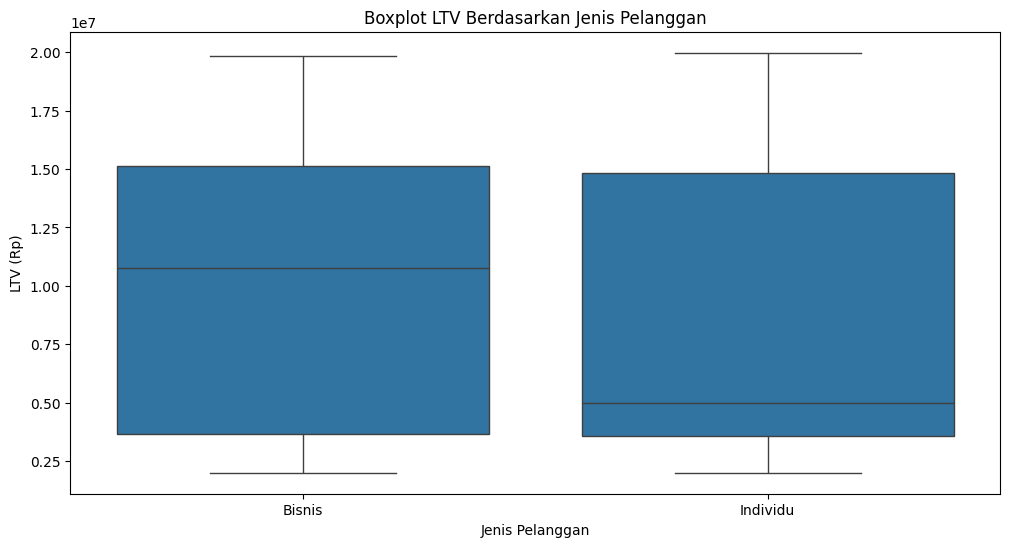

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Jenis_Pelanggan", y="LTV(Rp)")
plt.title("Boxplot LTV Berdasarkan Jenis Pelanggan")
plt.xlabel("Jenis Pelanggan")
plt.ylabel("LTV (Rp)")
plt.show()

In [101]:
total_ltv = df.groupby("Jenis_Pelanggan")["LTV(Rp)"].sum()
total_ltv_percentage = (total_ltv / total_ltv.sum()) * 100
print("\nTotal LTV per Segmen dan Kontribusinya terhadap Pendapatan Perusahaan:")
print(total_ltv_percentage)


Total LTV per Segmen dan Kontribusinya terhadap Pendapatan Perusahaan:
Jenis_Pelanggan
Bisnis      32.403341
Individu    67.596659
Name: LTV(Rp), dtype: float64


### Analisis :

1. Distribusi LTV berdasarkan Histogram
- Segmen Individu:
  - Sebagian besar pelanggan memiliki LTV rendah hingga menengah, dengan konsentrasi tinggi di kisaran Rp 2.500.000 hingga Rp 5.000.000.
  - Dibandingkan dengan pelanggan bisnis, segmen ini memiliki penyebaran data yang lebih kecil.
- Segmentasi Bisnis:
  - Distribusi LTV lebih luas, dengan nilai LTV yang tersebar hingga nilai tinggi (di atas Rp 15.000.000), menunjukkan bahwa beberapa pelanggan bisnis memberikan kontribusi yang signifikan terhadap pendapatan.
  - Ada beberapa pelanggan bisnis dengan LTV yang sangat tinggi, sekitar Rp 20.000.000, yang tidak ditemukan di segmen individu.

2. Boxplot Distribusi LTV
- Pelanggan Bisnis:
  - Median LTV segmen bisnis lebih tinggi daripada segmen individu, menunjukkan bahwa setengah dari pelanggan bisnis memberikan kontribusi pendapatan yang lebih besar.
  - Rentang interquartile (IQR) yang lebih lebar di segmen bisnis menunjukkan variasi yang lebih besar di antara pelanggan, dengan beberapa outlier signifikan pada nilai LTV tertinggi.
- Pelanggan Individu:
  - Dibandingkan dengan pelanggan bisnis, pelanggan individu memberikan kontribusi yang lebih kecil dan memiliki median LTV yang lebih rendah. - Selain itu, perbedaan antara pelanggan individu dan pelanggan bisnis lebih kecil.

3. Proporsi Total LTV per Segmen
- Segmen Individu (67,6%):
  - Segmen ini memiliki kontribusi terbesar terhadap total pendapatan perusahaan karena jumlah pelanggan individu yang lebih besar daripada rata-rata LTV.
- Segmen Bisnis (32,4%):
  - Segmen ini memiliki kontribusi terbesar secara keseluruhan, tetapi rata-rata LTV per pelanggannya lebih tinggi. Pelanggan perusahaan dapat memberikan nilai jangka panjang yang besar.

**Kesimpulan dan Rekomendasi**
1. Kontribusi Segmen Individu:
  - Penyumbang utama pendapatan adalah segmen individu (67,6%). Untuk mempertahankan pendapatan yang stabil, fokus pada peningkatan skala dengan memperoleh pelanggan baru.
  - Meningkatkan LTV per pelanggan individu dapat dicapai melalui strategi retensi seperti program loyalitas, diskon, dan peningkatan layanan pelanggan.

2. Segmentasi Bisnis Memiliki Potensi:
- Dengan LTV per pelanggan yang lebih tinggi, segmen ini adalah target utama untuk meningkatkan nilai dalam jangka panjang.
- Persentase kontribusi segmen bisnis terhadap total pendapatan dapat meningkat dengan melakukan upaya untuk akuisisi pelanggan bisnis, seperti memberikan layanan premium atau penawaran khusus untuk bisnis.

3. Strategi untuk Menjadi Berbeda:
  - Strategi individu berpusat pada volume pelanggan dan strategi promosi massal.
  - Strategi bisnis berpusat pada layanan personalisasi dan program eksklusif untuk meningkatkan retensi pelanggan bisnis bernilai tinggi.

Dengan menggabungkan strategi ini, GlobalNet dapat secara efektif meningkatkan pendapatan dari kedua segmen pelanggan.









## Soal 5

Bagaimana kontribusi pelanggan dengan tingkat pendapatan rendah terhadap total pendapatan perusahaan?

Meskipun pelanggan dengan pendapatan rendah mungkin memiliki LTV yang lebih kecil, GlobalNet ingin mengetahui seberapa besar kontribusi total mereka terhadap pendapatan keseluruhan.


### Jawab :

In [102]:
kontribusi_pendapatan = df.groupby("Tingkat_Pendapatan")["LTV(Rp)"].sum()
kontribusi_pendapatan_percentage = (kontribusi_pendapatan / df["LTV(Rp)"].sum()) * 100
print(kontribusi_pendapatan_percentage)

Tingkat_Pendapatan
Menengah    39.709985
Rendah      24.046226
Tinggi      36.243790
Name: LTV(Rp), dtype: float64


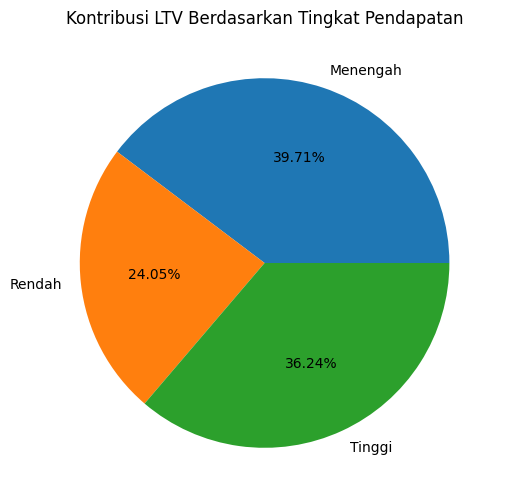

In [103]:
plt.figure(figsize=(10, 6))
plt.pie(kontribusi_pendapatan_percentage, labels=kontribusi_pendapatan_percentage.index, autopct=lambda pct: f'{pct:.2f}%')
plt.title("Kontribusi LTV Berdasarkan Tingkat Pendapatan")
plt.show()

### Analisis :

1. Pelanggan Pendapatan Rendah:
  - Kontribusi: Pelanggan dengan pendapatan rendah menyumbang 24,05% dari total LTV atau pendapatan perusahaan.
  - Analisis: Meskipun secara individual pelanggan berpendapatan rendah memiliki LTV yang lebih kecil, secara agregat mereka memberikan kontribusi signifikan terhadap total pendapatan. Ini menunjukkan bahwa meskipun nilai transaksi rata-rata mereka lebih rendah, ukuran populasi mereka cukup besar untuk memberikan dampak substansial.
  - Insight: Pelanggan berpendapatan rendah tetap merupakan segmen yang penting untuk dipertahankan. GlobalNet dapat merancang strategi retensi dan meningkatkan loyalitas pelanggan di segmen ini, misalnya dengan menawarkan paket layanan yang lebih terjangkau atau program loyalitas yang menarik.

2. Pelanggan Pendapatan Menengah:
  - Kontribusi: Pelanggan berpendapatan menengah menyumbang kontribusi terbesar, yaitu sekitar Rp 3,69 miliar atau sekitar 37,7% dari total pendapatan perusahaan.
  - Analisis: Segmen pendapatan menengah merupakan kelompok yang paling menguntungkan bagi perusahaan. Mereka memiliki keseimbangan antara jumlah populasi yang cukup besar dan nilai transaksi yang cukup tinggi. Segmen ini mungkin lebih sensitif terhadap program peningkatan nilai layanan atau peningkatan kualitas.
  - Insight: Mempertahankan dan meningkatkan pengalaman pelanggan di segmen ini dapat memberikan dampak yang sangat besar terhadap pendapatan perusahaan. GlobalNet bisa menawarkan program layanan tambahan atau diskon eksklusif untuk segmen ini.

3. Pelanggan Pendapatan Tinggi:
  - Kontribusi: Pelanggan berpendapatan tinggi berkontribusi sekitar Rp 3,36 miliar atau 34,2% dari total pendapatan.
  - Analisis: Meskipun segmen ini memberikan kontribusi yang besar, mereka tidak seunggul segmen menengah. Ini mungkin karena meskipun pelanggan berpendapatan tinggi cenderung memiliki LTV yang besar, populasi mereka lebih sedikit dibandingkan dengan segmen menengah.
  - Insight: Untuk memaksimalkan kontribusi segmen pendapatan tinggi, GlobalNet dapat menawarkan layanan premium, fasilitas eksklusif, atau personalisasi layanan yang lebih baik. Dengan begitu, loyalitas dan pengeluaran pelanggan di segmen ini bisa terus ditingkatkan.

**Kesimpulan Utama:**
- Pelanggan berpendapatan rendah tetap memberikan kontribusi signifikan terhadap total pendapatan (24,05%). Walaupun mereka tidak menghasilkan LTV yang tinggi, ukurannya yang besar menjadikan segmen ini penting.
- Pelanggan berpendapatan menengah adalah segmen yang paling menguntungkan, berkontribusi sebesar 37,7% dari total pendapatan. Fokus pada strategi retensi dan peningkatan layanan di segmen ini sangat penting.
- Pelanggan berpendapatan tinggi juga merupakan kelompok penting dengan kontribusi 34,2%, tetapi bisa ditingkatkan lebih lanjut dengan penawaran layanan eksklusif.

Strategi yang difokuskan pada peningkatan pengalaman pelanggan di ketiga segmen ini dapat membantu meningkatkan pendapatan GlobalNet secara keseluruhan.



## Soal 6

Analisis perbedaan AOV antara pelanggan bisnis dan individu berdasarkan tingkat pendapatan.

Apakah pelanggan bisnis dengan pendapatan tinggi memiliki AOV yang lebih tinggi dibandingkan pelanggan individu dengan pendapatan yang sama?



### Jawab :

In [104]:
df["Nilai_AOV(Rp)"] = df["Nilai_AOV(Rp)"].astype(float)

perbedaan_aov = df.groupby(["Jenis_Pelanggan", "Tingkat_Pendapatan"])["Nilai_AOV(Rp)"].mean().reset_index()
print(perbedaan_aov)

  Jenis_Pelanggan Tingkat_Pendapatan  Nilai_AOV(Rp)
0          Bisnis           Menengah   7.583218e+05
1          Bisnis             Tinggi   1.994856e+06
2        Individu           Menengah   7.586651e+05
3        Individu             Rendah   7.569260e+05
4        Individu             Tinggi   2.113941e+06


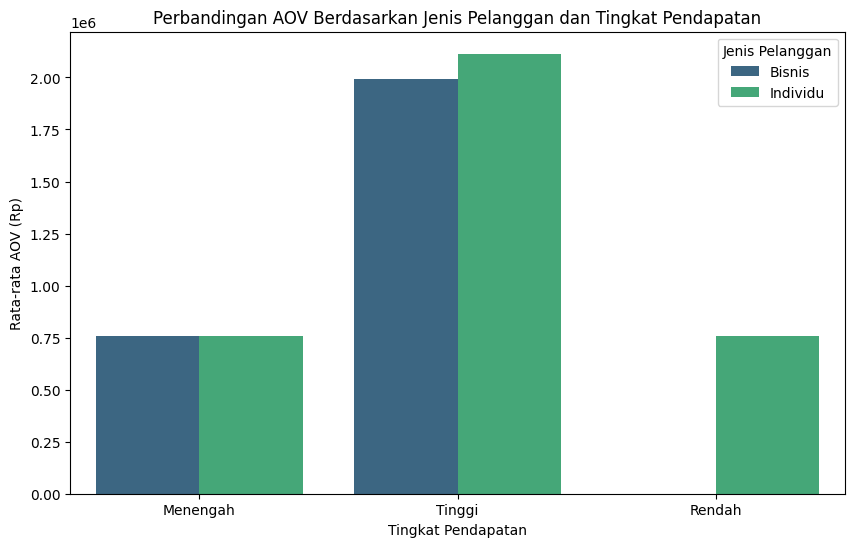

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(data=perbedaan_aov, x="Tingkat_Pendapatan", y="Nilai_AOV(Rp)", hue="Jenis_Pelanggan", palette="viridis")
plt.title("Perbandingan AOV Berdasarkan Jenis Pelanggan dan Tingkat Pendapatan")
plt.xlabel("Tingkat Pendapatan")
plt.ylabel("Rata-rata AOV (Rp)")
plt.legend(title="Jenis Pelanggan")
plt.show()

In [106]:
!pip install scipy

In [107]:
from scipy.stats import ttest_ind
pendapatan_levels = df["Tingkat_Pendapatan"].unique()
for level in pendapatan_levels:
    bisnis_aov = df[(df["Jenis_Pelanggan"] == "Bisnis") & (df["Tingkat_Pendapatan"] == level)]["Nilai_AOV(Rp)"]
    individu_aov = df[(df["Jenis_Pelanggan"] == "Individu") & (df["Tingkat_Pendapatan"] == level)]["Nilai_AOV(Rp)"]

    stat, p_val = ttest_ind(bisnis_aov, individu_aov, equal_var=False)
    print(f"Tingkat Pendapatan: {level}")
    print(f"Rata-rata AOV Bisnis: {bisnis_aov.mean():,.2f}, Individu: {individu_aov.mean():,.2f}")
    print(f"T-Test p-value: {p_val:.4f}\n")

Tingkat Pendapatan: Tinggi
Rata-rata AOV Bisnis: 1,994,856.02, Individu: 2,113,941.28
T-Test p-value: 0.0564

Tingkat Pendapatan: Menengah
Rata-rata AOV Bisnis: 758,321.82, Individu: 758,665.07
T-Test p-value: 0.9830

Tingkat Pendapatan: Rendah
Rata-rata AOV Bisnis: nan, Individu: 756,926.02
T-Test p-value: nan



### Analisis :


1. Tingkat Pendapatan Tinggi
- Rata-rata AOV:
  - Bisnis: Rp 1.994.856,02
  - Individu: Rp 2.113.941,28
- Hasil Uji T-Test:
  - p-value = 0,0564 (tidak signifikan pada α = 0,05).

Analisis:

Meskipun pelanggan individu memiliki rata-rata AOV yang lebih tinggi dibandingkan pelanggan bisnis pada tingkat pendapatan tinggi, perbedaan tersebut tidak signifikan secara statistik (p-value > 0,05). Artinya, kontribusi keduanya pada tingkat ini relatif serupa.

2. Tingkat Pendapatan Menengah
- Rata-rata AOV:
  - Bisnis: Rp 758.321,82
  - Individu: Rp 758.665,07
- Hasil Uji T-Test:
  - p-value = 0,9830 (tidak signifikan).

Analisis:

Pada tingkat pendapatan menengah, rata-rata AOV antara pelanggan bisnis dan individu hampir sama. Hasil uji statistik mengonfirmasi bahwa tidak ada perbedaan signifikan antara kedua segmen ini.

3. Tingkat Pendapatan Rendah
- Rata-rata AOV:
  - Bisnis: Tidak tersedia (NaN, mungkin karena data kosong).
  - Individu: Rp 756.926,02.

Analisis:

Data pelanggan bisnis untuk tingkat pendapatan rendah tidak tersedia, sehingga tidak dapat dibandingkan. Namun, rata-rata AOV untuk pelanggan individu pada tingkat ini terbilang rendah dibandingkan tingkat pendapatan lainnya.

**Kesimpulan**
1. Kontribusi Pelanggan Bisnis vs Individu:
  - Pada tingkat pendapatan tinggi, pelanggan individu memiliki AOV lebih tinggi, tetapi perbedaan tidak signifikan.
  - Untuk tingkat menengah, AOV kedua segmen hampir sama.
  - Pada tingkat rendah, data pelanggan bisnis tidak tersedia, sehingga hanya pelanggan individu yang memberikan kontribusi.
2. Rekomendasi Strategi:
  - Fokus pada pelanggan individu dengan pendapatan tinggi untuk meningkatkan nilai transaksi rata-rata.
  - Tingkatkan upaya pengelolaan atau segmentasi pelanggan bisnis pada tingkat pendapatan tinggi untuk mendekati AOV individu.
  - Evaluasi data pelanggan bisnis pada tingkat pendapatan rendah, karena tidak tersedia untuk analisis.

